In [ ]:
import json
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Input, BatchNormalization, Flatten, Embedding, Dropout
from tensorflow.keras.utils import to_categorical, load_img
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from itertools import zip_longest
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.model_selection import train_test_split

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

x = []

y = []

for i in range(500):
  if os.path.exists("Bengin case (" + str(i) + ").jpg") == True:
    img = cv2.imread("Bengin case (" + str(i) + ").jpg")
    img = cv2.resize(img, (512, 512), fx = 0.1, fy = 0.1)
    x.append(img)
    y.append([1, 0, 0])

  if os.path.exists("Malignant case (" + str(i) + ").jpg") == True:
    img = cv2.imread("Malignant case (" + str(i) + ").jpg")
    img = cv2.resize(img, (512, 512), fx = 0.1, fy = 0.1)
    x.append(img)
    y.append([0, 1, 0])

  if os.path.exists("Normal case (" + str(i) + ").jpg") == True:
    img = cv2.imread("Normal case (" + str(i) + ").jpg")
    img = cv2.resize(img, (512, 512), fx = 0.1, fy = 0.1)
    x.append(img)
    y.append([0, 0, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, shuffle = False)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape, y_train.shape

((733, 512, 512, 3), (733, 3))

In [ ]:
model = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 3)),

    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(100, activation='relu'),

    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 30, verbose = 1)

model.evaluate(x_test, y_test, batch_size = 30)

Epoch 1/10
25/25 [==============================] - 207s 8s/step - loss: 1721.9810 - accuracy: 0.6112
Epoch 2/10
25/25 [==============================] - 203s 8s/step - loss: 4.5382 - accuracy: 0.9427
Epoch 3/10
25/25 [==============================] - 206s 8s/step - loss: 0.1117 - accuracy: 0.9918
Epoch 4/10
25/25 [==============================] - 201s 8s/step - loss: 0.3500 - accuracy: 0.9932
Epoch 5/10
25/25 [==============================] - 212s 8s/step - loss: 0.0250 - accuracy: 0.9945
Epoch 6/10
25/25 [==============================] - 215s 9s/step - loss: 6.0660e-08 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 205s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
25/25 [==============================] - 205s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
25/25 [==============================] - 214s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 14s 2s/step - loss: 62.9634 - accuracy:

[62.96343231201172, 0.46739131212234497]

1/1 [==============================] - 0s 161ms/step
[[0. 0. 1.]]


array([[[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       ...,

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[38, 38, 38],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]]], dtype=uint8)
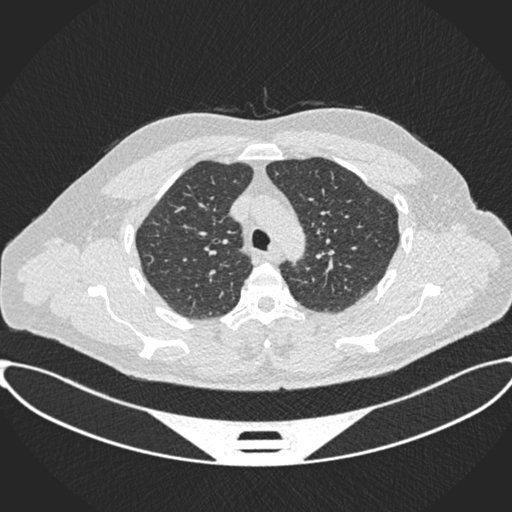

In [ ]:
pic = []
picture = "Bengin case (1).jpg"
picture2 = "Malignant case (55).jpg"
picture3 = "Normal case (46).jpg"

test = cv2.imread(picture3)
pic.append(test)

pic = np.array(pic)

prediction = model.predict(pic)
print(prediction)
test

In [ ]:
h = "Lung Cancer Model"

model.save(h)

nn = keras.models.load_model(h)

nn.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7917a06e3970>>